# ODE Solvers
## Lecture 12

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

## Runge-Kutta Methods

Many mechanics (physics) can be expressed as the mathematical problem of solving an ordinary differential equation (ODE). In general, we need to solve

\begin{align}
\frac{dy}{dt} = f(y,t), \quad y(0) = y_0
\end{align}

### Review of Euler's method

We can approximate derivative with a **forward difference**

\begin{align}
 \frac{dy}{dt} &= \frac{y(t+\Delta t) - y(t)}{\Delta t} + \mathcal{O}(\Delta t) \\
 y(t+\Delta t) &= y(t) + \frac{dy}{dt}\Delta t + \mathcal{O}(\Delta t^2) 
\end{align}

since $\frac{dy}{dt} = f(y,t)$ we can write

$$  y(t+\Delta t) = y(t) + f(y,t) \Delta t + \mathcal{O}(\Delta t^2) $$

We say that Euler's method is accurate to *first-order* in $\Delta t$ since it is equivalent to the Taylor series up to first order in $\Delta t$.

### Midpoint scheme or Second-Order Runge-Kutta Method

Start with a **central difference** representation for a derivative

\begin{align}
 \frac{dy}{dt} &= \frac{y(t+\Delta t) - y(t-\Delta t)}{2 \Delta t} + O(\Delta t^2) \\
 y(t+\Delta t) &= y(t-\Delta t) + 2 \frac{dy}{dt} \Delta t + O(\Delta t^3) \\
  &= y(t - \Delta t) + 2 f(y(t), t)\Delta t +O(\Delta t^3)
\end{align}

$f(y(t), t)$ is evaluated at the midpoint in time between $t - \Delta t$ and $t+\Delta t$. 

We can rewrite this as

$$ y(t+\Delta t) = y(t) + f\left(y(t + \Delta t /2), t + \Delta t/2\right)\Delta t +O(\Delta t^3)$$

i.e. $\Delta t \rightarrow \Delta t / 2$, then we can shift $t \rightarrow t + \Delta t / 2$

So, if we can estimate 

$$ f\left(y(t + \Delta t /2), t + \Delta t/2\right) $$

we can gain an order in our truncation error. To do this we need to estimate $y(t+\Delta/2)$.

Trick: use an Euler half-step

$$
y ( t + \Delta t / 2) = y(t) + f(y(t), t)  \frac{\Delta t}{2} + \mathcal{O}(\Delta t^2)
$$


We can show (through a Taylor expansion) that this leads to a final estimate of $y(t + \Delta t)$ that is accurate to *second-order* in $\Delta t$. For the simpler case where $ \frac{dy}{dt} = f(y)$,

$$\begin{align}
f\left(y(t+\frac{\Delta t}{2})\right) &= f\left(y(t) + \frac{\Delta t}{2} y'(t) + \mathcal{O}(\Delta t^2)\right)\\
&= f(y(t)) + \frac{df(y)}{dy} \left( \frac{\Delta t}{2} y'(t) + \mathcal{O}(\Delta t^2)  \right) + \mathcal{O}(\Delta y^2) \\
&= f(y) + \frac{\Delta t}{2} y'(t) \frac{df(y)}{dy} + \mathcal{O}(\Delta t^2) \\
&= f(y) + \frac{\Delta t}{2} \frac{dy}{dt}  \frac{df}{dt} \frac{dt}{dy}+ \mathcal{O}(\Delta t^2) \\
&= f(y) + \frac{\Delta t}{2}   \frac{df}{dt}+ \mathcal{O}(\Delta t^2) \\
\end{align}
$$

So the mid-point method becomes

$$\begin{align}
y(t +\Delta t) &= y(t) + \Delta t f\left( y(t + \frac{\Delta t}{t} )\right) + \mathcal{O}(\Delta t^3) \\
&= y(t) + \Delta t f(y) +  \frac{\Delta t^2}{2}   \frac{df}{dt}+ \mathcal{O}(\Delta t^3) \\
&= y(t) + \Delta t y'(t) +  \frac{\Delta t^2}{2}  y''(t) + \mathcal{O}(\Delta t^3)
\end{align}$$

with this procedure, we indeed recover the Taylor series up to second order in $\Delta t$.

### Midpoint Algorithm

1\. Estimate slope at $t$

$$ s_1 = f(y(t), t) $$

2\. Use $s_1$ to estimate the midpoint between $t$ and $t + \Delta t$

\begin{align}
y^* &= y ( t + \Delta t) \\
       &= y(t) + \frac{\Delta t}{2} s_1
\end{align}
 	

3\. Use $y^*$ to get the the slope at the midpoint

$$ s_2 = f( y^*, t +  \frac{\Delta t}{2} ) $$

4\. Use $s_2$ to estimate $y(t + \Delta t)$

$$ y(t + \Delta t) = y(t) + \Delta t s_2 $$

### Midpoint Algorithm

\begin{align}
s_1 &= f(y_i, t_i) \\
y^* &= y_i + \Delta t / 2 s_1 \\
s_2 &= f(y^*, t_i + \Delta t /2) \\
y_{i+1} &= y_i + \Delta t s_2
\end{align}

Although the algorithm takes two steps, there is an order gain in accuracy. The error of the scheme is of order  $\Delta t^2$. This means that decreasing the timestep  $\Delta t$ by a factor of  2 decreases the error by a factor of 4. 

It also means that compared to the Euler scheme and for the same time step used the accuracy of the scheme is better.

This algorihm is sometimes calleed the *Midpoint Algorithm*, the *Euler-Richardson Algorithm*, or the *Second-Order Runge-Kutta Method*.

### Fourth-Order Runge-Kutta Method

A very common scheme is the classical Fourth-Order Runge-Kutta formula.

$$
\begin{align}
    s_1 &= f(y_i, t_i,) \\
    y_{1/2} &= y_i + s_1 \Delta t /2 \\ 
    s_2 &= f(y_{1/2}, t + \Delta t / 2) \\
    y_{1/2}^* &= y_i + s_2 \Delta t / 2  \\
    s_3 &= f(y_{1/2}^*, t + \Delta t / 2) \\
    y^* &= y_i + s_3 \Delta t  \\
    s_4 &= f(y^*, t + \Delta t) \\
    y_{i+1} &= y_i  +  \frac{\Delta t}{6} (s_1+2 s_2+2s_3+s_4)\\
\end{align}
$$

The error of the scheme is of order  $\Delta t^4$. This means that decreasing the timestep  $\Delta t$ by a factor of 2 decreases the error by a factor of 16. It also means that compared to the Euler or midpoint schemes the accuracy is typically much better.

## Examples

### Example 1

Solve numerically the following ODE

$$ \frac{dy}{dt} = - y $$

with initial condition

$$ y(0)=1$$

using the Euler and midpoint and RK4 methods and compare graphically the numerical solutions to the exact solution. Take 
$\Delta t$=0.5 and carry out the simulation up to $t=4$.

In [2]:
tmax = 4
dt = 0.5

N = round(tmax/dt)
t = np.arange(0, tmax, dt)

# Exact solution
y_exact = 1 * np.exp(-t)

# Euler's method
y = np.zeros(N)
y[0] = 1
for i in range(N-1):
    s1 = -y[i]
    y[i+1]  = y[i] + s1*dt
y_euler = y

# Midpoint method
y = np.zeros(N)
y[0] = 1
for i in range(N-1):
    s1 = -y[i]
    ytmp = y[i] + dt/2 * s1
    s2 = -ytmp
    y[i+1]  = y[i] + s2*dt
y_midpoint = y

# RK4 method
y = np.zeros(N)
y[0] = 1
for i in range(N-1):
    s1 = -y[i]
    y1 = y[i] + s1 * dt/2
    s2 = -y1
    y2 = y[i] + s2 * dt/2
    s3 = -y2
    y3 = y[i] + s3 * dt
    s4 = -y3
    y[i+1] = y[i] + (s1 + 2*s2 + 2*s3 + s4)/6*dt
y_RK4 = y

### Compare the solutions

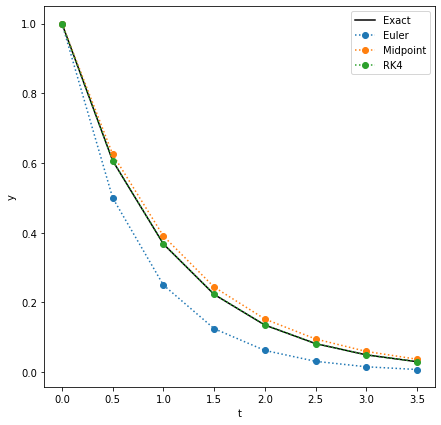

In [3]:
fig, axes = plt.subplots(figsize=(7,7))
plt.plot(t, y_exact, 'k-',  label='Exact')
plt.plot(t, y_euler, 'o:',  label='Euler')
plt.plot(t, y_midpoint, 'o:',  label='Midpoint')
plt.plot(t, y_RK4, 'o:',  label='RK4')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.show()

### Example 2

Solve numerically the following ODE

$$ \frac{dy}{dt} = -2 y +3 e^{-4t} $$

 with initial condition
 
$$ y(0)=1$$ 

 using the Euler and midpoint methods, and compare graphically the numerical solutions to the exact solution. Take 
$\Delta t =0.2$ and carry out the simulation up to  $t=3$.

In [5]:
tmax = 3
dt = 0.2

N = round(tmax/dt)
t = np.arange(0, tmax, dt)

# Exact solution
y_exact = 1/2* np.exp(-4*t)*(5*np.exp(2*t)-3)

# define the right hand side
def f(y, t):
    return -2*y+3*np.exp(-4*t)

# Euler's method
y = np.zeros(N)
y[0] = 1
for i in range(N-1):
    s1 = f(y[i], t[i])
    y[i+1]  = y[i] + s1*dt
y_euler = y

# Midpoint scheme
y = np.zeros(N)
y[0] = 1
for i in range(N-1):
    s1 = f(y[i], t[i])
    ytmp = y[i] + dt/2 * s1
    s2 = f(ytmp, t[i] + dt/2)
    y[i+1]  = y[i] + s2*dt
y_midpoint = y

# RK4 method
y = np.zeros(N)
y[0] = 1
for i in range(N-1):
    s1 = f(y[i], t[i])
    y1 = y[i] + s1 * dt/2
    s2 = f(y1, t[i] + dt/2)
    y2 = y[i] + s2 * dt/2
    s3 = f(y2, t[i] + dt/2)
    y3 = y[i] + s3 * dt
    s4 = f(y3, t[i] + dt)
    y[i+1] = y[i] + (s1 + 2*s2 + 2*s3 + s4)/6*dt
y_RK4 = y

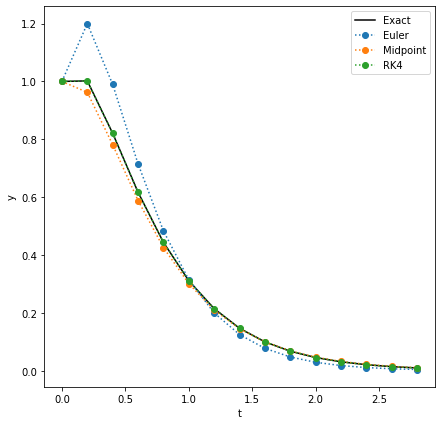

In [6]:
fig, axes = plt.subplots(figsize=(7,7))
plt.plot(t, y_exact, 'k-',  label='Exact')
plt.plot(t, y_euler, 'o:',  label='Euler')
plt.plot(t, y_midpoint, 'o:',  label='Midpoint')
plt.plot(t, y_RK4, 'o:',  label='RK4')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.show()

It should be  clear that, for the same time step, the fourth-order Runge-Kutta method is much more accurate.

## Examples of Physical Systems

Consider the following three mechanics problems:

#### 1. Projective motion with quadratic air drag
$$ \begin{align}
x' &= v_x  \\
y' &= v_y  \\
v_x' &= - C_2 v v_x / m \\
v_y' &= -g - C_2 v v_y  /m
\end{align}
$$

#### 2. Proton in a magnetic field
\begin{align}
x' &=  v_x   \\
y' &= v_y    \\
z' &=  v_z   \\
v_x' &=  q v_y B / m\\
v_y' &=  - q v_x B /m  \\
v_z' &=  0
\end{align}

##### 3. Duffing Oscillator
\begin{align}
x' &= v \\
v' &= - \delta v - \alpha x+\beta x^{3} + \gamma \cos(\omega t)
\end{align}

where $x' = \frac{d x}{d t}$ and $v' = \frac{d v}{dt}$.

## General Dynamical System

All of these example are of the same general form:

$$
\begin{align}
x' &= f_1(x, y, v_x, v_y,  t) \\
y' &= f_2(x, y, v_x, v_y,  t) \\
v_x' &= f_3(x, y, v_x, v_y, t) \\
v_y' &= f_4(x, y, v_x, v_y, t) \\
\ldots
\end{align}
$$

For every variable that might be in and problem ($x, y, z, v_x, v_y, v_z, \ldots$ and  perhaps others), the equations of motion gives its derivative with respect to time $t$ on the left hand side (LHS). On the right hand side (RHS) of each equation, there some function that depends (potentially) on all the variables and time, $t$.

Some of these RHS functions might be pretty easy. For example, for the first equation with the Duffing Oscillator we have

$$ f_1(x, v, t) = v$$

or they could be much more complicated, such as the second equation with the Duffing Oscillator that is

$$ f_2(x, v, t ) = - \delta v - \alpha x+\beta x^{3} + \gamma \cos(\omega t)$$

This is example, $\delta, \alpha, \beta, \gamma, $ and $\omega$ are *parameters* of the problem.

#### State vector

The particular values of $x, y, v_x, v_y, \ldots$ at any particular time $t$ define the *state* of the system.

Let's introduce a new vector, called $\vec{s}$ for *state*, that groups all of the these variables together:

$$
\vec{s} = (x, y, v_x, v_y) 
$$ 

This allows us to write our system of equations in a slightly more compact form:

$$
\begin{align}
x' &= f_1(\vec{s}, t)\;\\
v' &= f_2(\vec{s}, t) \\
\ldots
\end{align}
$$

We can be even more compact if we consider the vector-valued functions. Define the vector-valued function $F$ such that

$$ \vec{F}(\vec{s}, t)  =  \left(f_1( \vec{s}, t),\; f_2( \vec{s}, t),\; \ldots \right)\;.$$

That allows us to write us our equation of motion as

$$ \frac{d \vec{s}}{dt}  = \vec{F}(\vec{s}, t) $$

where we return to the notation $\frac{d}{dt}$ for readability.

#### Parameter vector

If we want to include parameters, say for

$$f_2( x, v, t ; \delta, \alpha, \beta, \gamma, \omega) = - \delta v - \alpha x+\beta x^{3} + \gamma \cos(\omega t)$$

we can use a semi-color ';' to indicate that the parameters are part of the function but not in the domain of the function.

If we introduce a vector for the parameters, $\vec{p}$, then using

$$ \vec{p} = (\delta, \alpha, \beta, \gamma, \omega) $$

allows us to write

$$f_2( \vec{s}, t ; \vec{p})$$

and therefore

$$ \frac{d \vec{s}}{d t} = \vec{F}(\vec{s}, t; \vec{p}) $$

#### Initial conditions

To complete solve a dynamical system we all need *initial conditions*.  That is, values of each of our variables for at some initial time $t = t_0$.  Suppose we have

$$\begin{align}
x(t_0) &= x_0 \\
y(t_0) &= y_0 \\
v_x(t_0) &= v_{x,0} \\
v_y(t_0) &= v_{y,0} \\
\ldots
\end{align}
$$

then we can compactly write this as

$$ \vec{s_0} = (x_0, y_0, v_{x,0}, v_{y,0})\;. $$

Therefore any dynamical system we have seen so far can be written as

$$
\begin{align}
\frac{d \vec{s} }{dt} &= \vec{F}(\vec{s}, t; \vec{p}) \\
\vec{s}(t_0) &= \vec{s_0}
\end{align}
$$

where 

- $\vec{s}$ is the state vector describing the system
- $\vec{F}$ is the vector valued function of all the right sides
- $\vec{p}$ are the parameters used (if any), and 
- $\vec{s_0}$ are the initial conditions

### A General Euler Method Stepper

With this general notation for any dynamical system, we can write one `EulerStepper()` function that solves any set of equations of motion with one reusable code.

In [7]:
def EulerStepper( F = lambda s, t, p: s,  
                  s0 = [],
                  t0 = 0,
                  p = [],
                  dt = 0.1, 
                  tmax = 1,
                ):
    """
    Solve the system 
    
      ds/dt = F(s, t; p)
      s(t0) = s0
      
    where s is a state vector dictionary
      and p are any required parameters
    
    using a time step dt up to tmax
    
    yields back the dictionary the current state and time)
    """
    
    #### Initialize the state and time
    s = np.array(s0)
    t = t0

    while t < tmax:
        # prepare to send the results back
        r = list(s)
        r.append(t)
        yield r
        
        # estimate the derivative
        ds = F(s, t, p)

        # update the state
        s = s + ds*dt
        
        t = t + dt

We can then use this Euler stepper to solve the projectile problem with air drag.

$$ \begin{align}
x' &= v_x  \\
y' &= v_y  \\
v_x' &= - C_2 v v_x / m \\
v_y' &= -g - C_2 v v_y  /m
\end{align}
$$


In [8]:
def F_projectile(s, t, p):
    """Equations for projectile with air drag"""
    
    # unpack state vector
    x, y, vx, vy = s
    
    # unpack parameters vector
    g, C2, m = p
    
    v = np.sqrt(vx**2 + vy**2)
    
    # compute derivatives
    ds = [ vx, 
           vy,
          -C2*v*vx/m,
          -g -C2*v*vy/m ]
    
    return np.array(ds)

In [9]:
def ProjectileApp():
    
    tmax = 0.4
    dt = 0.01
    
    # initial conditions
    x0 = 0
    y0 = 10
    vx0 = 30
    vy0 = 0

    # parameters
    g = 9.81
    C2 = 0.4
    m = 2
    
    # intial state vector
    s0 = [x0, y0, vx0, vy0]
    # parameters vector
    p = [g, C2, m]

    stepper = EulerStepper(F_projectile, s0=s0, p=p, 
                           tmax=tmax, dt=dt)
    data = pd.DataFrame(stepper,
                        columns = ['x', 'y', 'vx', 'vy', 't'])
    return data

Text(0, 0.5, 'y')

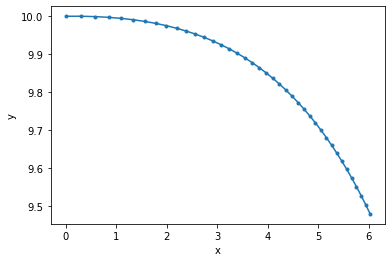

In [10]:
data = ProjectileApp()
plt.plot(data.x, data.y, '.-')
plt.xlabel('x')
plt.ylabel('y')

- - -
### Discussion:

State and parameters vectors are being exchanged as NumPy arrays.  The order of the variables is really important.
- - - 

We can use the same numerical method to solve for the motion of a proton in a magnetic field:

\begin{align}
x' &=  v_x   \\
y' &= v_y    \\
z' &=  v_z   \\
v_x' &=  q v_y B / m\\
v_y' &=  - q v_x B /m  \\
v_z' &=  0
\end{align}

In [14]:
def F_proton(s, t, p):
    """Equations for proton in a magnetic field"""
    
    # unpack state vector
    x, y, z, vx, vy, vz = s
    
    # unpack parameters vector
    q, B, m = p
    
    ds = [ vx, vy, vz,
           q*vy*B/m, -q*vx*B/m, 0 ] 
    
    return np.array(ds)

In [15]:
def ProtonApp():
    
    tmax = 1e-6   # length of simulation, s
    dt = 1e-9
    
    x0 = 0
    y0 = 0
    z0 = 0
    vx0 = 4.7e6   # initial horizontal velocity, m/s
    vy0 = 0
    vz0 = 1e6     # initial 'out-of-page' velocity, m/s
    
    q = 1.602e-19 # charge, C
    m = 1.67e-27  # mass of particle, kg
    B = 0.35      # magnetic field, T

    # intial state
    s0 = [x0, y0, z0, vx0, vy0, vz0]

    # parameters
    p = [q, B, m]

    stepper = EulerStepper(F_proton, s0=s0, p=p, 
                           tmax=tmax, dt=dt)
    
    data = pd.DataFrame(stepper, 
                        columns = ['x', 'y', 'z', 'vx', 'vy', 'vz', 't'])
    
    return data

Text(0.5, 0, 'y (m)')

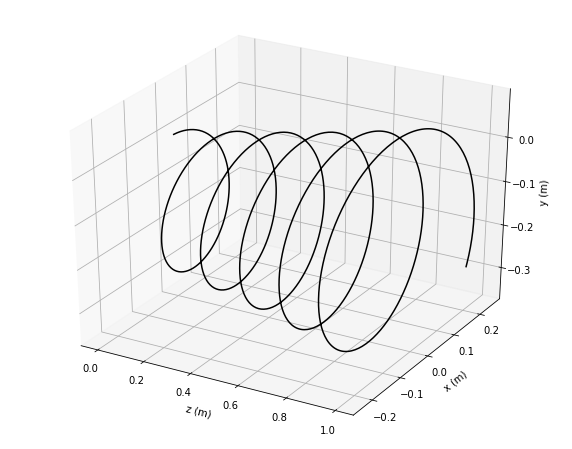

In [16]:
data = ProtonApp()
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

plt.plot(data.z, data.x, data.y, color='k')

ax.set_xlabel('z (m)')
ax.set_ylabel('x (m)')
ax.set_zlabel('y (m)') 

This abstraction allows us to not have to reimplement the numerical method for each new problem. Alternatively, we can easily try a new numerical algorithm without having to recode the physical problem.

For the proton in a magnetic fields, the proton should be tracing out a helix pattern. Let's switch to a better numerical algorithm.

In [17]:
def MidpointStepper( F = lambda s, t, p: s,  
                     s0 = [],
                     t0 = 0,
                     p = [],
                     dt = 0.1, 
                     tmax = 1,
                   ):
    """ 
    Solve the system 
    
      ds/dt = F(s, t; p)
      s(t0) = s0
      
    where s is a state vector dictionary
      and p are any required parameters
    
    using a time step dt up to tmax
    
    yields back the dictionary r (current state and time)
    """
    
    #### Initialize the state and time
    s = np.array(s0)
    t = t0

    while t < tmax:
        # prepare to send the results back
        r = list(s)
        r.append(t)
        yield r
        
        # estimate the derivative
        ds1 = F(s, t, p)

        # estimate the midpoint
        s1 = s + ds1*dt/2
        
        # estimate the derivative at the mid-point
        ds2 = F(s1, t+dt/2, p)
        
        # update the state vector
        s = s + ds2*dt
        
        t = t + dt

The only change in the application we need to make is name of the stepper that we need to call:

In [18]:
def ProtonApp():
    
    tmax = 1e-6   # length of simulation, s
    dt = 1e-9
    
    x0 = 0
    y0 = 0
    z0 = 0
    vx0 = 4.7e6   # initial horizontal velocity, m/s
    vy0 = 0
    vz0 = 1e6     # initial 'out-of-page' velocity, m/s
    
    q = 1.602e-19 # charge, C
    m = 1.67e-27  # mass of particle, kg
    B = 0.35      # magnetic field, T

    # intial state
    s0 = [x0, y0, z0, vx0, vy0, vz0]

    # parameters
    p = [q, B, m]

    stepper = MidpointStepper(F_proton, s0=s0, p=p, 
                           tmax=tmax, dt=dt)
    
    data = pd.DataFrame(stepper, 
                        columns = ['x', 'y', 'z', 'vx', 'vy', 'vz', 't'])
    return data

Text(0.5, 0, 'y (m)')

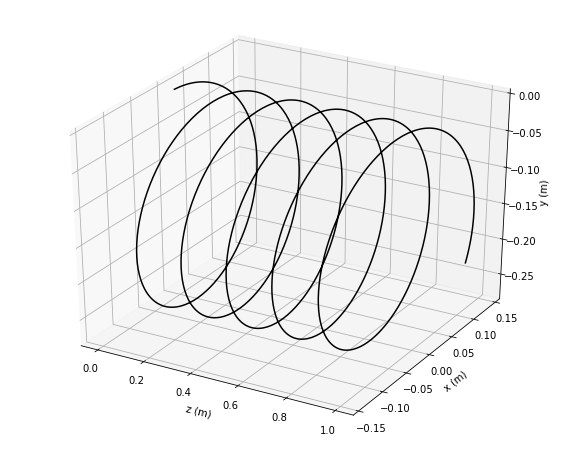

In [19]:
data = ProtonApp()
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

plt.plot(data.z, data.x, data.y, color='k')

ax.set_xlabel('z (m)')
ax.set_ylabel('x (m)')
ax.set_zlabel('y (m)') 

A much better with result with the same size time step!

Even cleaner is if we didn't have to rewrite the main application / driver program at all.

In [20]:
def ProtonApp(Stepper=EulerStepper):
    
    tmax = 1e-6   # length of simulation, s
    dt = 1e-9
    
    x0 = 0
    y0 = 0
    z0 = 0
    vx0 = 4.7e6   # initial horizontal velocity, m/s
    vy0 = 0
    vz0 = 1e6     # initial 'out-of-page' velocity, m/s
    
    q = 1.602e-19 # charge, C
    m = 1.67e-27  # mass of particle, kg
    B = 0.35      # magnetic field, T

    # intial state
    s0 = [x0, y0, z0, vx0, vy0, vz0]

    # parameters
    p = [q, B, m]

    stepper = Stepper(F_proton, s0=s0, p=p, 
                           tmax=tmax, dt=dt)
    
    data = pd.DataFrame(stepper, 
                        columns = ['x', 'y', 'z', 'vx', 'vy', 'vz', 't'])

    return data

Now we can quickly run the program with either numerical models to see the differences:

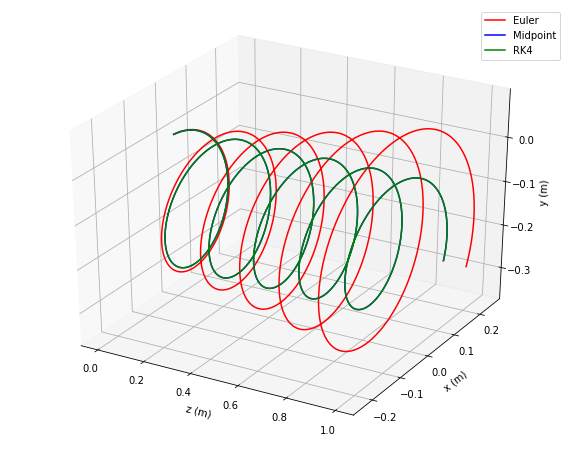

In [28]:
data_euler = ProtonApp(Stepper=EulerStepper)
data_midpoint = ProtonApp(Stepper=MidpointStepper)
data_RK4 = ProtonApp(Stepper=RK4Stepper)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
    
plt.plot(data_euler.z, data_euler.x, data_euler.y, color='r', label='Euler')
plt.plot(data_midpoint.z, data_midpoint.x, data_midpoint.y, color='b', label='Midpoint')
plt.plot(data_RK4.z, data_RK4.x, data_RK4.y, color='g', label='RK4')
plt.legend()

ax.set_xlabel('z (m)')
ax.set_ylabel('x (m)')
ax.set_zlabel('y (m)') 
plt.show()

In [27]:
def RK4Stepper( F = lambda s, t, p: s,  
                     s0 = [],
                     t0 = 0,
                     p = [],
                     dt = 0.1, 
                     tmax = 1,
                   ):
    """ 
    Solve the system 
    
      ds/dt = F(s, t; p)
      s(t0) = s0
      
    where s is a state vector dictionary
      and p are any required parameters
    
    using a time step dt up to tmax
    
    yields back the dictionary r (current state and time)
    """
    
    #### Initialize the state and time
    s = np.array(s0)
    t = t0

    while t < tmax:
        # prepare to send the results back
        r = list(s)
        r.append(t)
        yield r
        
        ## CAREFUL s1 meant slope, but here we are using s for state!!
        
        # s1 = f(y[i], t[i])
        ds1 = F(s, t, p)
        
        # y1 = y[i] + s1 * dt/2
        s1 = s + ds1*dt/2
        
        # s2 = f(y1, t[i] + dt/2)
        ds2 = F(s1, t + dt/2, p)
        
        # y2 = y[i] + s2 * dt/2
        s2 = s + ds2*dt/2
        
        # s3 = f(y2, t[i] + dt/2)
        ds3 = F(s2, t + dt/2, p)
        
        # y3 = y[i] + s3 * dt
        s3 = s + ds3*dt
        
        # s4 = f(y3, t[i] + dt)
        ds4 = F(s3, t + dt, p)
        
        # y[i+1] = y[i] + (s1 + 2*s2 + 2*s3 + s4)/6*dt
        s = s + (ds1 + 2*ds2 + 2*ds3 + ds4)/6*dt
        
        t = t + dt

- - -
## Lab 4

Today and Thursday.  

## Assignment 4

Available now and due Sunday, October 27, 2019.  One question is on numerical integration (Simpson's Rule) and the other is on solving ODEs numerically.  